# Analysis of Yelp Business Intelligence Data

# Installation and Initial Setup

In [1]:
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("seaborn==0.10.0")
sc.install_pypi_package("numpy==1.18.4")
sc.install_pypi_package("pyspark==2.4.5")
sc.install_pypi_package("ipython==7.14.0")
sc.install_pypi_package("subprocess.run==0.0.8")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1588749333705_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)

  Using cached seaborn-0.10.0-py3-none-any.whl (215 kB)
  Using cached scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (26.1 MB)

  Using cached numpy-1.18.4-cp36-cp36m-manylinux1_x86_64.whl (20.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.5
    Not uninstalling numpy at /usr/local/lib64/python3.6/site-packages, outside environment /tmp/1589387057452-0
    Can't uninstall 'numpy'. No files were found to uninstall.

Processing /mnt/var/lib/livy/.cache/pip/wheels/84/30/e3/c51c5cd0229631e662d29d7b578a3e5949a4c8db033ffb70aa/pyspark-2.4.5-py2.py3-none-any.whl


# Importing

In [176]:
from IPython import display 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
from pyspark import *

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
absl-py                    0.8.1
astor                      0.8.0
backcall                   0.1.0
beautifulsoup4             4.8.1
bleach                     3.1.0
boto                       2.49.0
cycler                     0.10.0
decorator                  4.4.2
funcsigs                   1.0.2
gast                       0.3.2
google-pasta               0.1.7
grpcio                     1.24.3
html5lib                   1.0.1
ipython                    7.14.0
ipython-genutils           0.2.0
jedi                       0.17.0
jmespath                   0.9.4
Keras-Applications         1.0.6
Keras-Preprocessing        1.0.5
kiwisolver                 1.2.0
lxml                       4.4.2
Markdown                   3.1.1
matplotlib                 3.2.1
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.18.4
pandas                     1.0.3


# Loading Data

In [4]:
business = spark.read.json("s3://my-little-pony/yelp/yelp_academic_dataset_business.json")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Overview of Data

In [5]:
iv = {'columns': len(business.columns), 'rows': business.count()}
print(f"Columns:{iv['columns']} | Rows:{iv['rows']}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns:14 | Rows:209393

In [6]:
business.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [237]:
business.createOrReplaceTempView("biz")
biz = spark.sql(""" 
SELECT \
name,  
state, 
stars, 
categories,
business_id
FROM business limit 5""")
biz.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+-----+--------------------+--------------------+
|                name|state|stars|          categories|         business_id|
+--------------------+-----+-----+--------------------+--------------------+
|The Range At Lake...|   NC|  3.5|Active Life, Gun/...|f9NumwFMBDn751xgF...|
|   Carlos Santo, NMD|   AZ|  5.0|Health & Medical,...|Yzvjg0SayhoZgCljU...|
|             Felinus|   QC|  5.0|Pets, Pet Service...|XNoUzKckATkOD1hP6...|
|Nevada House of Hose|   NV|  2.5|Hardware Stores, ...|6OAZjbxqM5ol29BuH...|
|USE MY GUY SERVIC...|   AZ|  4.5|Home Services, Pl...|51M2Kk903DFYI6gnB...|
+--------------------+-----+-----+--------------------+--------------------+

# Analyzing Categories
Let's now answer this question: how many unique categories are represented in this dataset?

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

How many businesses are categorized as Active Life, for instance
What are the top 20 most popular categories available?

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.


### Total Unique Categories
what is the total number of unique categories available?

### Top  Business Categories

In [282]:

query = """
SELECT 
business_id,
explode(split(categories, ',')),
categories
FROM biz"""

bizcat = spark.sql(query)
bizcat.show(4)

tmp = bizcat.drop("categories")\
            .withColumnRenamed('business_id', 'ID')\
            .withColumnRenamed('col', 'Category')

categories = tmp.groupBy("Category").count()
categories = categories.sort("count", ascending = False)
categories.show(20)

pdf=categories.toPandas()

pdf.head(10).plot(x='Category', 
                 y='count', 
                 kind='barh',
                 stacked = True,
                 colormap='hot', 
                 fontsize = 5.5, 
                figsize = (5, 6), 
                  align="center")

print("There is a total of ", {categories.count()}, " Unique Categories")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+--------------------+
|         business_id|              col|          categories|
+--------------------+-----------------+--------------------+
|f9NumwFMBDn751xgF...|      Active Life|Active Life, Gun/...|
|f9NumwFMBDn751xgF...| Gun/Rifle Ranges|Active Life, Gun/...|
|f9NumwFMBDn751xgF...|      Guns & Ammo|Active Life, Gun/...|
|f9NumwFMBDn751xgF...|         Shopping|Active Life, Gun/...|
+--------------------+-----------------+--------------------+
only showing top 4 rows

+--------------------+-----+
|            Category|count|
+--------------------+-----+
|         Restaurants|44488|
|            Shopping|26128|
|                Food|24452|
|         Restaurants|19456|
|       Home Services|16205|
|       Beauty & Spas|14216|
|    Health & Medical|13978|
|      Local Services|11958|
|           Nightlife|11415|
|                Bars|10201|
|          Automotive|10063|
| Event Planning &...| 8911|
|                Food| 8539|
|            Sh

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

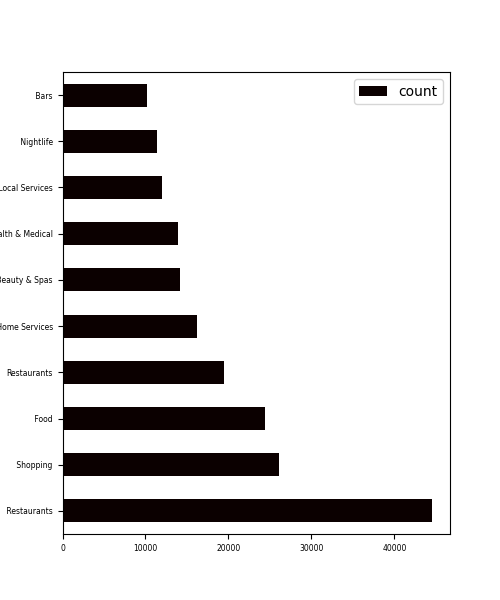

In [283]:
%matplot plt

# Do Yelp Reviews Skew Negative?
Oftentimes, it is said that the only people who write a written review are those who are extremely dissatisfied or extremely satisfied with the service received.

How true is this really? Let's try and answer this question.

Loading User Data
Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [308]:
review = spark.read.load('s3://my-little-pony/yelp/reviews.json', 
                         format='json'
                        ).select("business_id", 
                                 "stars", 
                                 "review_id", 
                                 "user_id", 
                                 "text")
business = spark.read.load('s3://my-little-pony/yelp/yelp_academic_dataset_business.json', 
                           format = 'json'
                          ).select("business_id", 
                                   "stars")


review_sub = review.select("business_id", "stars", "user_id") 
review_sub.createOrReplaceTempView("review_Bsub_avg")
review_Bsub_avg = review_sub.groupBy("business_id"
                                    ).mean("stars"
                                          ).withColumnRenamed(
    "avg(stars)", 
    "avgRating")
review_sub.createOrReplaceTempView("review_Usub_avg")
review_Usub_avg = review_sub.groupBy("user_id").mean("stars").withColumnRenamed("avg(stars)", "avgRating")

review_Bsub_avg.show(5)
review_Usub_avg.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|         avgRating|
+--------------------+------------------+
|ATeOjZzE3VOI-RW7F...| 3.433734939759036|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vbUABNAQI2iwN7v0x...|2.4545454545454546|
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+
only showing top 5 rows

+--------------------+------------------+
|             user_id|         avgRating|
+--------------------+------------------+
|KWFiZKiZBANVxuhm4...| 4.142857142857143|
|VmYpF5C3GL-7wFnvO...|               3.6|
|1Dul59QEe-Q-7OQHT...|              3.75|
|xS6kmkMXp0PRrFwkS...|3.9473684210526314|
|j56G3m8vYtA_2Io6F...|              4.25|
+--------------------+------------------+
only showing top 5 rows

In [357]:
business.createOrReplaceTempView("business_sub_avg")
business_sub_avg = spark.sql("""
SELECT business_id as BID, 
avg(stars) as TotalRating
FROM business 
GROUP BY business_id""")
business_sub_avg.show(2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------+
|                 BID|TotalRating|
+--------------------+-----------+
|JUFIUjadF1rCMQJ01...|        3.0|
|VdlbAvRYAqb8B4SIe...|        1.0|
+--------------------+-----------+
only showing top 2 rows

In [382]:
tbl = review_Bsub_avg.join(business_sub_avg, business_sub_avg.BID == review_Bsub_avg.business_id,"full" ).drop('BID').withColumnRenamed('business_id', 'ID').withColumnRenamed('avgRating', 'ReviewRating')
tbl.show(20)
df = tbl.toPandas()
df.head(2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+-----------+
|                  ID|      ReviewRating|TotalRating|
+--------------------+------------------+-----------+
|--9e1ONYQuAa-CB_R...|  4.11784140969163|        4.0|
|-6c_bJblLXUwoWfmY...|2.3333333333333335|        2.5|
|-ElDqujEn1u64ynQr...|             4.375|        4.5|
|-Gh9a15ijNii-8rnp...|3.3333333333333335|        3.5|
|-I06hkMFrX0KBqu61...|               5.0|        5.0|
|-Qb6U1MotJfpt6OU_...|               5.0|        5.0|
|-RRnldwSqCZT6OpuW...|               5.0|        5.0|
|-Spbg8zeDHA49Ys_f...|               5.0|        5.0|
|-TGwtTiieh_JLml5_...|               3.5|        3.5|
|-VAsjhmAbKF3Pb_-8...|2.0833333333333335|        2.0|
|-WGjtt88-6zBiIUiK...|2.6666666666666665|        2.5|
|-cxD1NimFldATDUsN...| 2.217391304347826|        2.0|
|-m8v19CXrGEYr3PAL...|               4.0|        4.0|
|-qL-wX-UuMaHDBA2X...| 3.801418439716312|        4.0|
|-r8SvItXXG6_T3mP5...|               4.0|        4.0|
|-tUFV7Zk3RCvPL8QI...| 4.833

In [399]:
df["ReviewRating"]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0         4.117841
1         2.333333
2         4.375000
3         3.333333
4         5.000000
            ...   
209388    3.714286
209389    4.555556
209390    3.923077
209391    3.621359
209392    3.666667
Name: ReviewRating, Length: 209393, dtype: float64

In [ ]:
class HypothesisTesting(obj): 
    def __init__(self,data): 
        self.data = data 
        self.MakeModel() 
        self.actual = self.TestStatistic(data)
        self.test_stats = None 
    def PValue(self, iters = 1000): 
        self.test_stats = numpy.array([self.TestStatistics(self.RunModel())
                                                          for _ in range(iters)])
        count = sum(self.test_stats >= self.actual)
        return count/iters 
    def MaxTestStat(self): 
        retun max(self.test_stats)
    def PlotHist(self, label=None): 
        def VertLine(x): 
            pyplot.plot([x,x], [0, max(ys)], linewidth=3, color='0.8')
            ys, xs, patches, = pylot.hist(ht.test_stats, color='#ffff99')
            VertLine(self.actual)
            pyplot.xlabel('test statistic')
            pyplot

In [400]:
import numpy 
import scipy.stats
import matplotlib.pyplot as plt


def TestStatistics(g1, g2): 
    abs(g1.mean() - g2.mean()) = test_stat for g1, g2 in _
    print("The difference in the means \nbetweeen the two groups is {t}".format(t=test_stat))
    
    if any((g1, g2)):
        n, m = len(g1), len(g2)
        pool = numpy.hstack((g1, g2))
        def Hypothesis(pool):
            numpy.random.shuffle(pool)
            data = pool[:n], pool[n:]  
    test_stat = TestStatistics()
    data = Hypothesis() 
    sim = numpy.array([TestStatistics(Hypothesis()) for i in range(1000)])
    def Vert(x): 
        pyplot.plot([x, x], [0, 300], linewidth=3, color='0.8')
return Vert(test_stat)
pyplot.hist(test_stats, color=COLORS)
pyplot.xlabel('difference in means')
pyplot.ylabel('count')
TestStatistics(df["ReviewRating"], df["TotalRating"])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

invalid syntax (<stdin>, line 7)
  File "<stdin>", line 7
    abs(g1.mean() - g2.mean()) = test_stat for g1, g2 in _
                                             ^
SyntaxError: invalid syntax



In [ ]:

review = spark.sql("""
SELECT business_id, review_id, stars, text, user_id FROM review""")
review = review.drop("date", "useful", "funny", "cool")

query = """
SELECT * FROM review
INNER JOIN biz
ON review.business_id = biz.business_id """

review.createOrReplaceTempView("joindf")
joindf = spark.sql(query)
joindf.show(10)

review = spark.sql("""
SELECT business_id, review_id, stars, text, user_id FROM review""")
review = review.drop("date", "useful", "funny", "cool")

query = """
SELECT * FROM review
INNER JOIN biz
ON review.business_id = biz.business_id """

review.createOrReplaceTempView("joindf")
joindf = spark.sql(query)
joindf.show(10)

In [ ]:
rdf = rf.select("business_id", "stars")

rdf.createOrReplaceTempView("A1")
A1 = spark.sql(
"""
SELECT business_id, avg(stars) AS r_avgstars
FROM A1
GROUP BY business_id
""")

BB = business.select("business_id", "stars")
BB.createOrReplaceTempView("biz")
A2 = spark.sql(
"""
SELECT business_id, avg(stars) AS b_avgstars
FROM biz
GROUP BY business_id
""")

A1.describe("r_avgstars").show()
A2.describe("b_avgstars").show()

# Should the Elite be Trusted? 
For the final portion - you have a choice:

Try and analyze some interesting dimension to this data. The ONLY requirement is that you must use the Users dataset and join on either the business* or reviews** dataset
Or, you may try and answer the question posed: how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.
Feel free to use any and all methodologies at your disposal - only requirement is you must render one visualization in your analysis

In [ ]:
df = spark.read.json("s3://my-little-pony/yelp/yelp_academic_dataset_user.json")
df.printSchema()

In [ ]:
BigFans = df.createOrReplaceTempView("elitesOnly")
BF = spark.sql(
"""
SELECT elite, useful,average_stars 
FROM elitesOnly
WHERE fans>=100
LIMIT 30
""").orderBy("fans", ascending=False)

LittleFans = df.createOrReplaceTempView("elitesOnly")
LF = spark.sql(
"""
SELECT elite, fans, cool, average_stars 
FROM elitesOnly
WHERE fans<=100
LIMIT 30
""").orderBy("fans", ascending=False)

In [ ]:
search = BF.groupby("useful", "average_stars").count().orderBy("average_stars", ascending=False)
search.show()

v= search.toPandas()
sns.relplot(x="average_stars", y="useful", hue= "useful", data=v)
plt.title(f"How useful are the Average Ratings of the Elites ?")

%matplot plt